# <center> PyTorch baseline for CIFAR10
**Код взят из [этого](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) тьюториала.**

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
import torch
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

**Загружаем данные.**

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  cat horse  frog   dog


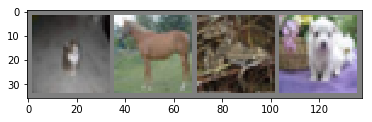

In [3]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

**Указываем архитектуру сети.**

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net.cuda()

Net (
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)

**Указываем функцию потерь и оптимизатор.**

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

**Обучаем мини-батчами, всего 10 эпох.**

In [6]:
for epoch in tqdm_notebook(range(10)):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in tqdm_notebook(enumerate(trainloader, 0)):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

A Jupyter Widget

A Jupyter Widget

[1,  2000] loss: 2.195
[1,  4000] loss: 1.869
[1,  6000] loss: 1.687
[1,  8000] loss: 1.573
[1, 10000] loss: 1.506
[1, 12000] loss: 1.449


A Jupyter Widget

[2,  2000] loss: 1.387
[2,  4000] loss: 1.371
[2,  6000] loss: 1.324
[2,  8000] loss: 1.285
[2, 10000] loss: 1.281
[2, 12000] loss: 1.288


A Jupyter Widget

[3,  2000] loss: 1.212
[3,  4000] loss: 1.223
[3,  6000] loss: 1.182
[3,  8000] loss: 1.193
[3, 10000] loss: 1.153
[3, 12000] loss: 1.183


A Jupyter Widget

[4,  2000] loss: 1.091
[4,  4000] loss: 1.110
[4,  6000] loss: 1.108
[4,  8000] loss: 1.122
[4, 10000] loss: 1.103
[4, 12000] loss: 1.105


A Jupyter Widget

[5,  2000] loss: 1.023
[5,  4000] loss: 1.030
[5,  6000] loss: 1.032
[5,  8000] loss: 1.056
[5, 10000] loss: 1.036
[5, 12000] loss: 1.057


A Jupyter Widget

[6,  2000] loss: 0.968
[6,  4000] loss: 0.986
[6,  6000] loss: 0.983
[6,  8000] loss: 0.999
[6, 10000] loss: 0.972
[6, 12000] loss: 0.999


A Jupyter Widget

[7,  2000] loss: 0.901
[7,  4000] loss: 0.926
[7,  6000] loss: 0.933
[7,  8000] loss: 0.953
[7, 10000] loss: 0.945
[7, 12000] loss: 0.952


A Jupyter Widget

[8,  2000] loss: 0.877
[8,  4000] loss: 0.884
[8,  6000] loss: 0.906
[8,  8000] loss: 0.909
[8, 10000] loss: 0.926
[8, 12000] loss: 0.905


A Jupyter Widget

[9,  2000] loss: 0.827
[9,  4000] loss: 0.851
[9,  6000] loss: 0.843
[9,  8000] loss: 0.898
[9, 10000] loss: 0.902
[9, 12000] loss: 0.885


A Jupyter Widget

[10,  2000] loss: 0.786
[10,  4000] loss: 0.814
[10,  6000] loss: 0.838
[10,  8000] loss: 0.852
[10, 10000] loss: 0.857
[10, 12000] loss: 0.878

Finished Training


**Прогноз для первого тестового мини-батча.**

GroundTruth:    cat  ship  ship plane


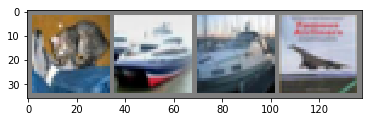

In [48]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [49]:
outputs = net(Variable(images.cuda()))

In [50]:
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car truck plane


**Теперь прогноз для всего теста.**

In [51]:
all_pred = np.empty((0,10), float)

In [52]:
for data in tqdm_notebook(testloader):
    images, _ = data
    outputs = net(Variable(images.cuda()))
    curr_pred = F.softmax(outputs.data).data.cpu().numpy()
    all_pred = np.vstack([all_pred, curr_pred])

A Jupyter Widget

In [53]:
all_pred.shape

(10000, 10)

In [54]:
pd.DataFrame(all_pred, columns=classes).to_csv('baseline.csv', index_label='id')